# The forbidden peace
Over the last five centuries, wars between Great Powers have become less frequent([Levy](https://www.jstor.org/stable/2600652?seq=1)) in terms of years of war (Fig. 1 right) and also number of contemporary wars (Fig. 1 left).  A gradual emergence of concepts like firstly total war and then long peace characterized the time slot from end of WWII until our days. Over the last 75 years, the death rate from conflicts between states has fallen to almost zero and combatants from Great Power nations have come into direct conflict only once([Cashman](https://assets.ctfassets.net/x5sq5djrgbwu/1cT1AsYCIomlUhOque0JgW/74ffb0b1a4803e1f9654e86e2c7f3af1/Great_Power_Conflict_report_-_Founders_Pledge.pdf)). Several attempts of explanation of the long peace has been given in the past ([Pinker](https://stevenpinker.com/publications/better-angels-our-nature)): first, that long peace is a nuclear peace direct consequence of the fear related to the ultimate destructive power of a nuclear war that could undermine the continuity of human being existence. Second, the long peace as a spreading of democracy all around the world is not consistent with the existence of the USSR which dominated together with the USA all the XX century during the Cold War. The other two more theoretically explanations for a long peace are not definitely explained by empirical evidences.

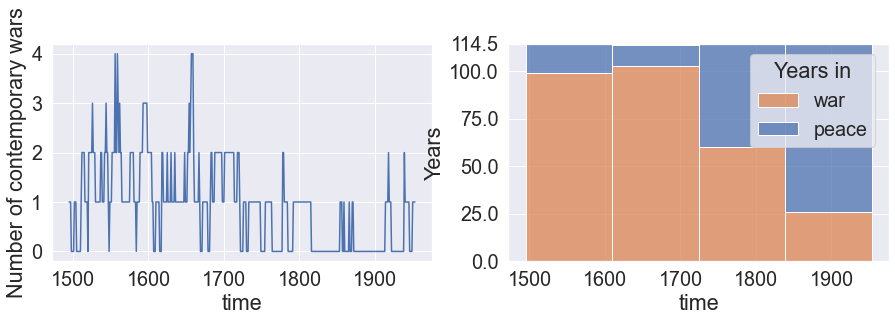

In [5]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style("darkgrid")
sns.set(font_scale = 1.8)

############ LOADING DATABASE GREAT POWER WARS
inFile = "GreatPowerWarsCSV.csv"
df = pd.read_csv(inFile,index_col=0,sep=";")
df.describe()

df["duration"] = df["END"] - df["START"]

time = np.arange(df["START"].min(),df["END"].max()+1,1)
warFlag = np.zeros(len(time))
warFlag_number= np.zeros(len(time))

for j in range(0,len(df)):
    ind_War = np.where(np.logical_and(np.greater_equal(time,df['START'][j]),
                         np.less_equal(time,df['END'][j])))
    warFlag_number[ind_War]=warFlag_number[ind_War]+1
    warFlag[ind_War]=1
    
dict_war = {'time': time, 'Years_War': warFlag, 'number_wars': warFlag_number}
df = pd.DataFrame(data=dict_war)

fig,ax = plt.subplots(1,2,figsize=(15,4))
#plt.figure(figsize=(10,10))
sns.lineplot(x="time", y="number_wars",data=df,ax=ax[0])
ax[0].set_ylabel("Number of contemporary wars")

x_min = int(df["time"].min())#minimum value
x_max = int(df["time"].max())#Maximum value
numYears = 100
range_bin_num = int(np.floor((x_max-x_min)/numYears))#num binf corresponding to numYears years
width_bin = (df.time.max()-df.time.min())/4

x = df.time
y = df.Years_War
sns.histplot(df, x="time",hue="Years_War",multiple="stack",bins=range_bin_num,ax=ax[1])
#ax=sns.displot(df, x="time",hue="Years_War",multiple="stack",bins=range_bin_num,
#              kind="hist",  linewidth=2,legend=False,height=6,aspect=1.2)
ax[1].set_ylabel("Years")
ax[1].set_ylim([0, width_bin])
ax[1].set_yticks(np.append(np.arange(0, width_bin, 25),width_bin))
plt.legend(title='Years in', loc='upper center', 
    bbox_to_anchor=(.8, 1.),
    ncol=1, 
    labels=['war', 'peace'])

The lack of an explanation of the long peace is here explained and justified by the simple fact that there is – and there was - no long peace. This is mainly related to the fact that only direct wars between power wars have been considered in the past XX century. The same arguments used for explaining the long peace – especially the first and the second previously reported- can be used to highlight the importance of indirect wars between great powers also known as proxy wars. These are extremely related to both nuclear fear - since proxy wars usually involve non-nuclear states supported by (nuclear) Great Powers- and spread of democracy – used as a justification for starting proxy wars. 
Instead of long peace it is here proposed another concept which is empirically justified, the concept of forbidden peace. From the end of WWI until present, the number of contemporary proxy wars deeply increased (Fig.2 left) with a fast acceleration at the beginning of Cold War; after the dissolution of USSR, the number of contemporary proxy wars decreases of about a half of the peak reached around 1980. Moreover, from 1927 until now the world has not seen a single year without a proxy war; the forbidden peace can be defined as the condition for which Great Powers fight each other using  proxy wars for all the time available in the considered time window. Instead of long peace which is unfounded by simply considering proxy wars and total war which is empirically rejected since you can always find a state which is not in a war condition, the forbidden peace is empirically evident for the XX century; Fig. 2 right shows that not a single year of peace existed in XX century, not even nowadays. The peace is de facto forbidden by increasing the number of proxy wars and spreading the number of states involved in them such that a global peace is not achievable (because of the huge amount of states involved). Such a process is not fully deterministic, meaning that the Great Powers do not act as having as main purpose to avoid the global peace; nevertheless, it is one of the consequences of their decisions. The global peace is practically impossible in such conditions: the states fighting each other in a local war act as symptoms of a much larger war condition involving great powers under abeyance which are not explicitly in war but that act by proxy.

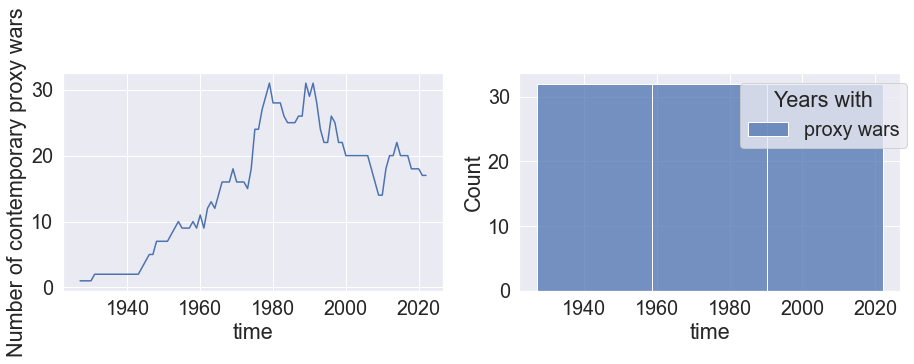

In [7]:

## PROXY WARS
inFile = "proxyWarsCSV.csv"
df_proxy = pd.read_csv(inFile,index_col=0,sep=";")
df_proxy.describe()

df_proxy['END'].replace('present', 2022,inplace=True)
df_proxy['END']=df_proxy['END'].astype(np.int64)

df_proxy["duration"] = df_proxy["END"] - df_proxy["START"]

time_proxy = np.arange(df_proxy["START"].min(),df_proxy["END"].max()+1,1)
warFlag_proxy = np.zeros(len(time_proxy))
warFlag_number_proxy= np.zeros(len(time_proxy))

for j in range(0,len(df_proxy)):
    ind_War = np.where(np.logical_and(np.greater_equal(time_proxy,df_proxy['START'][j]),
                         np.less_equal(time_proxy,df_proxy['END'][j])))
    warFlag_number_proxy[ind_War]=warFlag_number_proxy[ind_War]+1
    warFlag_proxy[ind_War]=1

## new database   
dict_war_proxy = {'time': time_proxy, 'Years_War': warFlag_proxy,
                  'number_wars': warFlag_number_proxy}
df_proxy_2 = pd.DataFrame(data=dict_war_proxy)

fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.lineplot(x="time", y="number_wars",data=df_proxy_2,ax=ax[0])
ax[0].set_ylabel("Number of contemporary proxy wars")

x_min = int(df_proxy_2["time"].min())#minimum value
x_max = int(df_proxy_2["time"].max())#Maximum value
numYears = 25
range_bin_num = int(np.floor((x_max-x_min)/numYears))#num binf corresponding to numYears years
sns.histplot(df_proxy_2, x="time",hue="Years_War",multiple="stack",bins=range_bin_num,ax=ax[1])
#sns.displot(df_proxy_2, x="time",hue="Years_War",multiple="stack",bins=range_bin_num,
#              kind="hist",  linewidth=2,legend=False,height=6,aspect=1.2)
ax[1].legend(title='Years with', loc='upper center', bbox_to_anchor=(.8, 1.), ncol=1, labels=['proxy wars'])
